In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def PSM_theory(x):
    numerator = (0.4133 * x - 0.1038 * x**2 + 0.01252 * x**3 + 0.007748 * x**4)
    denominator = (1 + 0.9771 * x - 0.3506 * x**2 + 0.09863 * x**3 + 0.009927 * x**4 + 0.000002173 * x**5)
    return numerator / denominator
x=np.linspace(0,10,1000)
y=np.zeros(len(x))
for i in range(0,len(x)):
    y[i]=PSM_theory(x[i])

In [51]:
muN=1.9103
#muN=1
pas="1"
#2
GEGM2=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGM.npy'))
GEGM2E=np.sum(np.load(f'SavedArrays/GEN2/Pass{pas}/GEGME.npy'))
#3
GEGM3=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGM.npy'))
GEGM3E=np.sum(np.load(f'SavedArrays/GEN3/Pass{pas}/GEGME.npy'))
#4
GEGM4=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGM.npy'))
GEGM4E=np.sum(np.load(f'SavedArrays/GEN4/Pass{pas}/GEGME.npy'))

In [52]:
GEGM3


0.37788635959020656

In [53]:
GEGM2E

-0.04361964509092352

In [54]:
GEN2Data = {
    'Q2': [3, 6.83, 9.82],
    'ExpName': ['GEn-II', 'GEn-II', 'GEn-II'],
    'R': [abs(muN*GEGM2), abs(muN*GEGM3), abs(muN*GEGM4)],
    'R_err': [abs(GEGM2E),abs(GEGM3E),abs(GEGM4E)],
    'GEn': [0.01, 0.02, 0.03],   # assuming GEn and GEn_err are present in the file
    'GEn_err': [0.001, 0.002, 0.003]
}

# CRYPTIC CODE___________________________

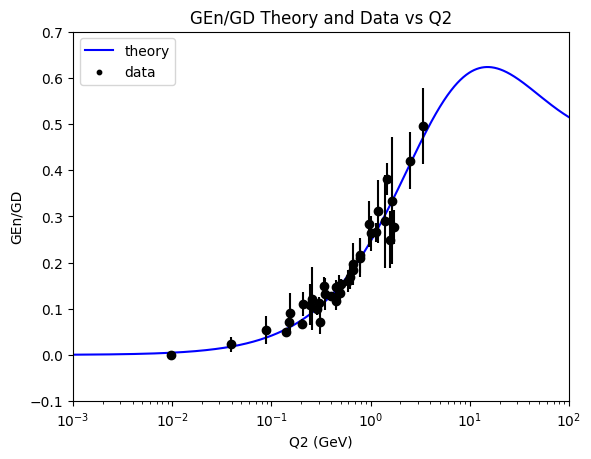

In [55]:
def Dipole(Q2):
    return (1+Q2/.71)**-2

GEndata = np.transpose(np.loadtxt('../DB/GLOBFIT17_gen_feb07.out'))
GEntheory = np.transpose(np.loadtxt('../DB/neutron_lookup.dat'))
Q2 = GEndata[0]
Q2t = GEntheory[0]
Q2t = np.sort(Q2t)
GEntrat=GEntheory[1]
GEn = GEndata[1]
GEnerr = GEndata[2]
rat = np.zeros(len(GEn))
raterr = np.zeros(len(GEnerr))
dipole = np.zeros(len(Q2))
for i in range(0,len(Q2)):
    dipole[i]=Dipole(Q2[i])
    


#plt.scatter(Q2,dipole,label='Dipole Form Factor')
#plt.title('Dipole Form Factor vs Q2 from GEn Data')
#plt.xlabel('Q2')
#plt.ylabel('GD')
for i in range(0,len(GEn)):
    rat[i]=GEn[i]/dipole[i]
    raterr[i]=GEnerr[i]/dipole[i]
plt.plot(Q2t,GEntrat,color='blue',label='theory')
plt.xlim((10**(-3),10**2))
plt.ylim((-.1,.7))
plt.xscale('log')
plt.title("GEn/GD Theory and Data vs Q2")
plt.xlabel('Q2 (GeV)')
plt.ylabel('GEn/GD')
plt.scatter(Q2,rat,color='black',s=10, label='data')
plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
plt.legend(loc='upper left')

#  End CRYPTIC CODE____________________________

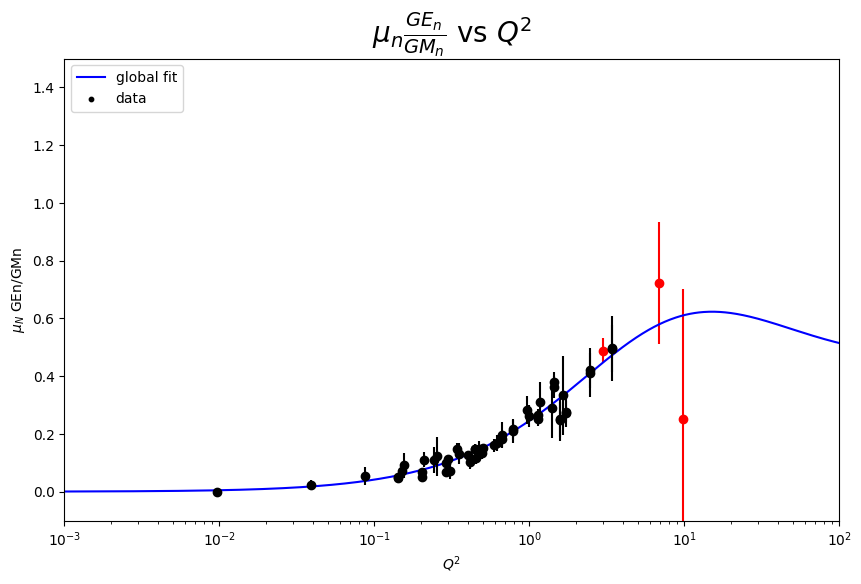

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../DB/worlddat.dat'
data = pd.read_csv(file_path)

additional_data_df = pd.DataFrame(GEN2Data)
data = pd.concat([data, additional_data_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(10, 6))

groups = data.groupby('ExpName')
colors=['red','black','black','black','black']
for color, (name, group) in zip(colors, groups):
    ax.errorbar(group['Q2'], group['R'], yerr=group['R_err'], fmt='o', color= color)

ax.set_xlabel('$Q^2$')
ax.set_ylabel('$\mu_N$ GEn/GMn')
ax.set_title(r'$\mu_n\frac{GE_n}{GM_n}$ vs $Q^2$',fontsize='20')
#plt.plot(x,y,'--',label="PSM",color='red')
plt.plot(Q2t,GEntrat,color='blue',label='global fit')
plt.scatter(Q2,rat,color='black',s=10, label='data')
plt.errorbar(Q2,rat,yerr=raterr,color='black',fmt='o')
ax.legend(loc='upper left')
plt.ylim(0,2.2)
plt.xlim(0,12)
plt.xlim((10**(-3),10**2))
plt.ylim((-.1,1.5))
plt.xscale('log')
plt.show()
